In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functions
%matplotlib inline

In [2]:
# load the gene expression dataset GSE22820

path = '/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/5_Mid_bootcamp_project_venv/data/Breast_GSE22820.csv'
df = pd.read_csv(path)
df.head(10)

,samples,type,NM_004900,AA085955,NM_014616,AK092846,NM_001539,THC2450799,NM_006709,NM_000978,...,AF117899,A_24_P287526,THC2349421,THC2272949,NM_138411,THC2350949,CR600872,NM_016058,AF520801,NM_203414
0,GSM563920_1,primary_breast_cancer,7.642101,4.803022,7.939666,5.790127,12.162603,5.378933,9.117912,13.907735,...,5.420074,5.535341,7.087367,5.940366,9.781396,4.740855,6.037292,8.960350,4.578823,8.486862
1,GSM563922_3,primary_breast_cancer,4.758954,5.150573,6.568998,5.352497,12.067264,4.606413,7.502331,14.625330,...,5.303676,5.303676,6.215967,4.731728,9.725169,5.381360,6.315188,9.064591,4.453024,9.982885
2,GSM563923_4,primary_breast_cancer,6.423254,4.408955,8.668739,4.979653,11.704731,6.466557,7.671957,13.580480,...,6.002756,6.023807,5.409657,5.036619,8.164628,5.230133,5.604062,10.090701,4.354638,8.361384
3,GSM563924_5,primary_breast_cancer,8.385947,4.454648,8.721586,5.121018,11.228727,5.390309,7.610587,13.933777,...,5.162009,5.176968,6.425804,4.810718,8.025828,4.511641,5.826439,9.580325,4.352350,7.998807
4,GSM563925_6,primary_breast_cancer,7.630389,4.598275,8.387313,5.221780,11.863483,4.501516,7.184051,14.535956,...,5.398244,5.345064,6.235113,4.618548,9.012896,6.544705,5.465001,10.584008,4.356300,7.862625
5,GSM563926_7,primary_breast_cancer,8.920266,4.713536,7.220090,6.337220,12.006183,7.744621,6.692041,14.449527,...,5.343288,5.343288,6.228258,4.628901,9.431941,8.218623,6.033377,10.149946,4.368847,7.726911
6,GSM563927_8,primary_breast_cancer,8.381502,4.788302,7.502661,5.438383,12.215057,5.160352,7.126575,14.226132,...,5.516072,5.378623,5.113644,5.062141,9.019891,4.959735,5.774270,10.016995,4.456662,9.798303
7,GSM563928_9,primary_breast_cancer,9.209772,4.689143,8.787514,5.216824,13.070204,4.458963,7.800924,13.902623,...,5.349400,5.537738,5.861783,4.838839,7.656276,5.583532,5.926412,9.482813,4.443359,8.010459
8,GSM563929_10,primary_breast_cancer,8.174604,4.922422,8.908414,6.405099,11.816925,4.524714,8.442629,14.248786,...,5.400082,5.376378,6.128218,4.775396,9.036853,5.443457,4.451945,9.436089,4.399745,10.402742
9,GSM563930_11,primary_breast_cancer,8.582873,5.439284,8.463425,5.439284,12.398760,5.104956,7.765574,13.237828,...,5.680828,5.825395,5.525873,4.476015,8.602001,4.941818,4.941818,10.005473,4.413101,8.013785


In [3]:
from sklearn.preprocessing import QuantileTransformer
def quantileTransformer1(df:pd.DataFrame, qt = None):
    """
    Apply quantile transformation to a DataFrame, transforming numerical columns to follow a normal distribution.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing numerical data for transformation.
    - qt (QuantileTransformer or None, optional): An existing QuantileTransformer object to apply, or None to fit a new one. Default is None.

    Returns:
    - Tuple: A tuple containing two elements:
        1. pd.DataFrame: Transformed DataFrame with numerical columns following a normal distribution.
        2. QuantileTransformer: The fitted or provided QuantileTransformer object.
    """
    df_transformed = df.copy()

    if qt is None:
        # Fit new dataset, if none is given
        qt = QuantileTransformer (output_distribution ='normal')
        qt.fit(df_transformed[df_transformed.columns[2:]])
    
    # Apply Transformation to data set
    df_transformed[df_transformed.columns[2:]] = qt.transform(df_transformed[df_transformed.columns[2:]])
    return df_transformed, qt

In [4]:
# transform data using quantileTransfromer function
df_transformed, qt = quantileTransformer1(df)

/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/5_Mid_bootcamp_project_venv/venv/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (139). n_quantiles is set to n_samples.
  warnings.warn(


In [5]:
df_transformed

,samples,type,NM_004900,AA085955,NM_014616,AK092846,NM_001539,THC2450799,NM_006709,NM_000978,...,AF117899,A_24_P287526,THC2349421,THC2272949,NM_138411,THC2350949,CR600872,NM_016058,AF520801,NM_203414
0,GSM563920_1,primary_breast_cancer,0.000000,0.618521,-0.831313,1.359737,0.732656,0.054519,5.199338,0.018165,...,-0.491337,-0.219723,1.796193,1.512390,1.572037,-0.511936,0.663131,-1.457684,1.572037,-0.109200
1,GSM563922_3,primary_breast_cancer,-5.199338,1.711675,-2.183684,0.294840,0.596675,-0.732656,-0.018165,1.359737,...,-0.967422,-1.090797,0.709103,-1.090797,1.359737,0.883786,1.273337,-1.159195,1.124338,0.910955
2,GSM563923_4,primary_breast_cancer,-0.910955,-1.359737,0.145827,-0.938814,-0.090945,0.663131,0.294840,-0.470943,...,0.663131,1.058440,-0.430727,-0.127492,-0.857254,0.732656,-0.238370,1.058440,-1.124338,-0.294840
3,GSM563924_5,primary_breast_cancer,0.732656,-0.857254,0.238370,-0.470943,-1.159195,0.090945,0.145827,0.145827,...,-1.457684,-1.711675,1.090797,-0.805918,-1.159195,-1.159195,0.294840,-0.036336,-1.273337,-0.831313
4,GSM563925_6,primary_breast_cancer,-0.018165,0.090945,-0.294840,-0.182650,0.201152,-1.195520,-0.663131,1.233495,...,-0.575109,-0.883786,0.781034,-1.572037,0.238370,1.895917,-0.575109,2.019086,-1.058440,-1.027154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,GSM564101_182,normal,-0.201152,0.553808,-0.182650,-0.756624,-0.857254,0.410882,0.553808,0.450744,...,-0.201152,-0.553808,-1.273337,-0.333005,0.511936,0.371661,-0.709103,0.054519,-0.201152,0.511936
135,GSM564102_183,normal,-0.938814,-1.027154,1.512390,-0.072720,-0.805918,0.967422,-0.883786,2.019086,...,0.219723,-0.127492,0.352267,0.201152,0.000000,-0.072720,0.781034,0.532755,0.430727,0.596675
136,GSM564103_184,normal,-0.857254,-1.512390,0.938814,-2.019086,-0.618521,1.159195,-0.257100,0.313866,...,1.159195,0.756624,-0.732656,0.182650,-0.883786,0.182650,0.575109,-0.553808,0.127492,-0.275921
137,GSM564104_185,normal,-1.457684,0.805918,0.793415,-1.637868,-0.470943,0.553808,-0.391196,0.553808,...,0.857254,0.238370,-0.072720,-0.430727,-0.352267,0.663131,0.996843,-0.410882,0.857254,0.371661


In [20]:
qt

QuantileTransformer(output_distribution='normal')

In [21]:
# melting the df_transformed for boxplot
melted_df_transformed = df_transformed.melt(id_vars=['samples', 'type'], var_name='gene', value_name='expression')
melted_df_transformed

,samples,type,gene,expression
0,GSM563920_1,primary_breast_cancer,NM_004900,0.000000
1,GSM563922_3,primary_breast_cancer,NM_004900,-5.199338
2,GSM563923_4,primary_breast_cancer,NM_004900,-0.910955
3,GSM563924_5,primary_breast_cancer,NM_004900,0.732656
4,GSM563925_6,primary_breast_cancer,NM_004900,-0.018165
...,...,...,...,...
4667476,GSM564101_182,normal,NM_203414,0.511936
4667477,GSM564102_183,normal,NM_203414,0.596675
4667478,GSM564103_184,normal,NM_203414,-0.275921
4667479,GSM564104_185,normal,NM_203414,0.371661


In [ ]:
# plot qt transformed data on boxplot

plt.figure(figsize=(20, 8))  # Adjust figure size if needed
sns.boxplot(x = 'samples',  y='expression', hue = 'type',  data=melted_df_transformed, width = 0.3)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(loc = 'upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
import scipy.stats as st
def getListDifferentialGenes1(df:pd.DataFrame, psig=0.05, tumor_value = 'tumoral', tumor_column = 'type'):
    """
    Identify differentially expressed genes between a specified tumor group and the rest of the samples in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing gene expression data.
    - psig (float, optional): Significance threshold for identifying differentially expressed genes. Default is 0.05.
    - tumor_value (str, optional): The specific tumor group for which differential expression is assessed. Default is 'tumoral'.
    - tumor_column (str, optional): The column defining the tumor groups. Default is 'type'.

    Returns:
    - list: A list of gene names that are differentially expressed in the specified tumor group based on a t-test.
    """    
    df2 = df.copy()

    df_cancer = df2[df2[tumor_column]==tumor_value]
    df_normal = df2[df2[tumor_column]!=tumor_value]

    differential_expressed_genes = []
    for col in df_cancer.columns[2:]:
        t, pvalue= st.ttest_ind(df_cancer[col],df_normal[col], equal_var = False, alternative = 'two-sided')
        if pvalue < psig:
            differential_expressed_genes.append(str(col))

    return differential_expressed_genes

In [23]:
# identify differential expressed genes

differential_expressed_genes = getListDifferentialGenes1(df_transformed, tumor_value = 'primary_breast_cancer', tumor_column = 'type')

In [ ]:
differential_expressed_genes


In [ ]:
len(differential_expressed_genes)

In [24]:
df_tranformed_DEG = df_transformed.copy()
df_tranformed_DEG = df_tranformed_DEG[['samples', 'type'] + differential_expressed_genes]

In [25]:
df_tranformed_DEG

,samples,type,NM_004900,NM_014616,AK092846,NM_001539,THC2450799,NM_000978,T12590,NM_001017,...,NM_005467,THC2358048,NM_024887,NM_021168,NM_005086,AK096148,BX414807,AL832183,AF117899,NM_203414
0,GSM563920_1,primary_breast_cancer,0.000000,-0.831313,1.359737,0.732656,0.054519,0.018165,0.238370,-0.618521,...,0.857254,-0.640667,0.491337,1.711675,-1.637868,0.294840,1.058440,-0.831313,-0.491337,-0.109200
1,GSM563922_3,primary_breast_cancer,-5.199338,-2.183684,0.294840,0.596675,-0.732656,1.359737,0.109200,1.796193,...,-0.072720,0.257100,-0.663131,1.233495,-1.572037,0.450744,-1.711675,-0.805918,-0.967422,0.910955
2,GSM563923_4,primary_breast_cancer,-0.910955,0.145827,-0.938814,-0.090945,0.663131,-0.470943,-1.359737,1.124338,...,1.058440,-0.410882,0.618521,0.831313,1.027154,-0.857254,0.685936,0.410882,0.663131,-0.294840
3,GSM563924_5,primary_breast_cancer,0.732656,0.238370,-0.470943,-1.159195,0.090945,0.145827,-0.371661,-0.491337,...,-0.238370,0.313866,0.333005,-1.233495,0.072720,0.000000,-1.027154,0.805918,-1.457684,-0.831313
4,GSM563925_6,primary_breast_cancer,-0.018165,-0.294840,-0.182650,0.201152,-1.195520,1.233495,0.709103,0.793415,...,0.732656,-1.359737,-0.575109,-0.938814,-0.018165,-0.145827,0.450744,-0.182650,-0.575109,-1.027154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,GSM564101_182,normal,-0.201152,-0.182650,-0.756624,-0.857254,0.410882,0.450744,-0.910955,0.553808,...,0.553808,-0.054519,0.831313,-0.596675,0.709103,-0.553808,-1.195520,0.596675,-0.201152,0.511936
135,GSM564102_183,normal,-0.938814,1.512390,-0.072720,-0.805918,0.967422,2.019086,-0.756624,1.407024,...,1.195520,1.124338,0.238370,-0.996843,5.199338,0.391196,-0.938814,5.199338,0.219723,0.596675
136,GSM564103_184,normal,-0.857254,0.938814,-2.019086,-0.618521,1.159195,0.313866,-0.967422,0.333005,...,0.709103,0.333005,1.711675,-0.450744,1.233495,-0.709103,0.371661,1.895917,1.159195,-0.275921
137,GSM564104_185,normal,-1.457684,0.793415,-1.637868,-0.470943,0.553808,0.553808,-1.027154,0.371661,...,1.637868,0.883786,1.273337,-0.831313,1.512390,-1.512390,-0.596675,0.450744,0.857254,0.371661


/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/5_Mid_bootcamp_project_venv/notebooks/functions.py:183: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df2[ColumnToPredict].value_counts()[0] != df2[ColumnToPredict].value_counts()[1]:
/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/5_Mid_bootcamp_project_venv/notebooks/functions.py:183: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df2[ColumnToPredict].value_counts()[0] != df2[ColumnToPredict].value_counts()[1]:


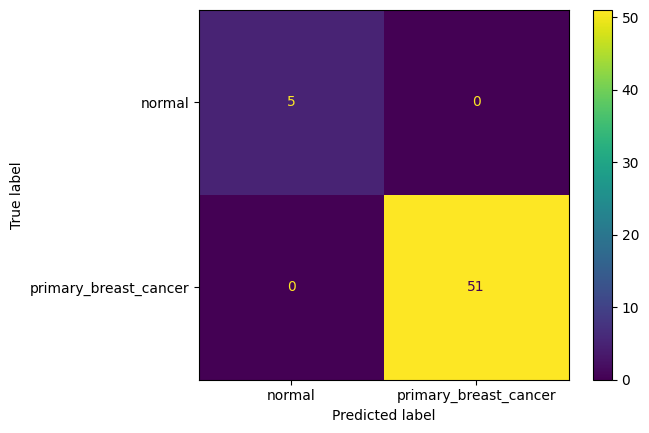

In [26]:
# model training without get rid of correlated variables
model, cm, scores = functions.trainLogisticModel(df_tranformed_DEG, ColumnToPredict='type', tumor_value = 'primary_breast_cancer')

In [27]:
model

LogisticRegression(random_state=0)

In [28]:
y_pred = model.predict(X = df_tranformed_DEG.drop(columns = ['samples', 'type']))
y_test = df_tranformed_DEG['type']

(LogisticRegression(random_state=0),
 array([[ 10,   0],
        [  1, 128]]),
 {'accuracy': 0.9928057553956835,
  'precision': 1.0,
  'recall': 0.9922480620155039,
  'f1': 0.9961089494163424,
  'kappa': 0.9484994442386069})

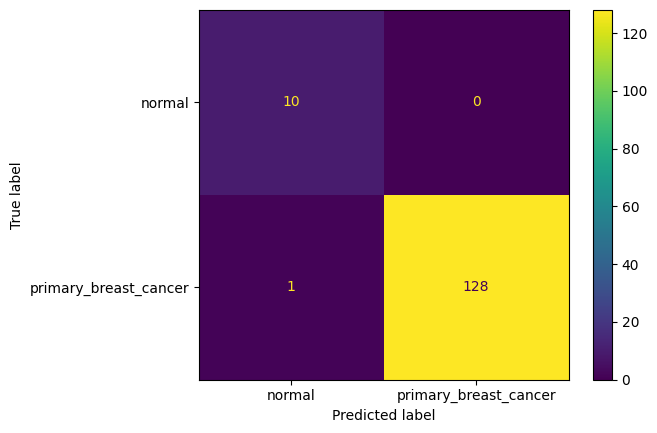

In [29]:
functions.LogisticModelView(model, y_pred, y_test, pos_label = 'primary_breast_cancer')

In [ ]:
r_values = df_tranformed_DEG[2:].corr()


In [ ]:
# Create a mask for values above the threshold
mask = (r_values.to_numpy() > 0.95) & (r_values.index.to_numpy() != r_values.columns.to_numpy()[:, None])

# Extract the column and index names where the mask is True
correlated_columns, correlated_rows = np.where(mask)

    for col, index in zip(r_values.columns[correlated_columns], r_values.index[correlated_rows]):
        value = r_values.at[index, col]
        correlated_genes_list.append([col, value, index])

    exclude_list = []
    included_columns = []

    for col in correlated_genes_list:
        if col not in included_columns:
            exclude_list.append(col[0])
            included_columns.append(col[2])

    return correlated_genes_list, exclude_list, r_values

In [17]:
# test function from Tim --> seem to not working

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {'x1': [1, 4, 4, 5, 6, ], 
     'x2': [0, 0, 8, 2, 4,], 
     'x3': [2, 8, 8, 10, 12,], 
     'x4': [-1, -4, -4, -4,-5]}

# Create a sample DataFrame
d = {'x1': [1, 4, 4, 5, 6, 0, 0, 8, 2, 4], 
     'x2': [0, 0, 8, 2, 4,2, 8, 8, 10, 12], 
     'x3': [2, 8, 8, 10, 12,-1, -4, -4, -4, -5], 
     'x4': [-1, -4, -4, -4, -5,1, 4, 4, 5, 6],
    'x5': [1, 4, 4, 5, 6, 0, 0, 8, 2, 4], 
     'x6': [0, 0, 8, 2, 4,2, 8, 8, 10, 12], 
     'x7': [2, 8, 8, 10, 12,-1, -4, -4, -4, -5], 
     'x8': [-1, -4, -4, -4, -5,1, 4, 4, 5, 6]}

df_test = pd.DataFrame(d)
df_test

,x1,x2,x3,x4,x5,x6,x7,x8
0,1,0,2,-1,1,0,2,-1
1,4,0,8,-4,4,0,8,-4
2,4,8,8,-4,4,8,8,-4
3,5,2,10,-4,5,2,10,-4
4,6,4,12,-5,6,4,12,-5
5,0,2,-1,1,0,2,-1,1
6,0,8,-4,4,0,8,-4,4
7,8,8,-4,4,8,8,-4,4
8,2,10,-4,5,2,10,-4,5
9,4,12,-5,6,4,12,-5,6


In [18]:
# Calculate the correlation matrix
corr_matrix = df_test.corr()
corr_matrix

,x1,x2,x3,x4,x5,x6,x7,x8
x1,1.000000,0.140475,0.336064,-0.232727,1.000000,0.140475,0.336064,-0.232727
x2,0.140475,1.000000,-0.587564,0.697621,0.140475,1.000000,-0.587564,0.697621
x3,0.336064,-0.587564,1.000000,-0.976726,0.336064,-0.587564,1.000000,-0.976726
x4,-0.232727,0.697621,-0.976726,1.000000,-0.232727,0.697621,-0.976726,1.000000
x5,1.000000,0.140475,0.336064,-0.232727,1.000000,0.140475,0.336064,-0.232727
x6,0.140475,1.000000,-0.587564,0.697621,0.140475,1.000000,-0.587564,0.697621
x7,0.336064,-0.587564,1.000000,-0.976726,0.336064,-0.587564,1.000000,-0.976726
x8,-0.232727,0.697621,-0.976726,1.000000,-0.232727,0.697621,-0.976726,1.000000


In [19]:


correlated_genes_list = []
mask = (corr_matrix.to_numpy() > 0.5) & (corr_matrix.index.to_numpy() != corr_matrix.columns.to_numpy()[:, None])
correlated_columns, correlated_rows = np.where(mask)
for col, index in zip(corr_matrix.columns[correlated_columns], corr_matrix.index[correlated_rows]):
    value = corr_matrix.at[index, col]
    correlated_genes_list.append([col, value, index])

exclude_list = []
included_columns = []

for col in correlated_genes_list:
    if col[0] not in included_columns:
        exclude_list.append(col[0])
        included_columns.append(col[2])
#display(correlated_genes_list)
display(exclude_list)
display(included_columns)

['x1', 'x2', 'x2', 'x2', 'x3']

['x5', 'x4', 'x6', 'x8', 'x7']

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {'A': [1, 2, 3, 4],
        'B': [2, 4, 6, 8],
        'C': [1, 1, 1, 1],
        'D': [5, 4, 3, 2]}

df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the threshold for correlation
threshold = 0.8  # You can adjust this threshold as needed

# Find highly correlated pairs
highly_correlated_pairs = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)

# Print the highly correlated pairs
print("Highly correlated pairs:")
for col in df.columns:
    correlated_cols = highly_correlated_pairs[col][highly_correlated_pairs[col]].index.tolist()
    for correlated_col in correlated_cols:
        if correlated_col != col:
            print(f"{col} and {correlated_col}: {corr_matrix.loc[col, correlated_col]:.2f}")

# Visualize the correlation matrix using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# testing function from Tim
# Create a sample DataFrame
d = {'x1': [1, 4, 4, 5, 6, 0, 0, 8, 2, 4], 
     'x2': [0, 0, 8, 2, 4,2, 8, 8, 10, 12], 
     'x3': [2, 8, 8, 10, 12,-1, -4, -4, -4, -5], 
     'x4': [-1, -4, -4, -4, -5,1, 4, 4, 5, 6],
    'x5': [1, 4, 4, 5, 6, 0, 0, 8, 2, 4], 
     'x6': [0, 0, 8, 2, 4,2, 8, 8, 10, 12], 
     'x7': [2, 8, 8, 10, 12,-1, -4, -4, -4, -5], 
     'x8': [-1, -4, -4, -4, -5,1, 4, 4, 5, 6]}

df_test = pd.DataFrame(d)
df_test

In [ ]:
highly_correlated_pairs = (corr_matrix.abs() > 0.5) & (corr_matrix.abs() < 1)
highly_correlated_pairs
for col in df_test.columns:
    correlated_cols = highly_correlated_pairs[col][highly_correlated_pairs[col]].index.tolist()
    correlated_cols
    #for correlated_col in correlated_cols:
     #   if correlated_col != col:
            #print(f"{col} and {correlated_col}: {corr_matrix.loc[col, correlated_col]:.2f}")
correlated_cols

In [ ]:
correlated_genes_list[0]

In [ ]:
exclude_list_1 = []
included_columns_1 = []
for col in correlated_genes_list:
    print(col)
    print(col[0])
    print(col[2])
    if col[0] not in included_columns_1:
        print( col[0] not in included_columns_1)
        exclude_list_1.append(col[0])
        included_columns_1.append(col[2])
        display(exclude_list_1)
        display(included_columns_1)


In [ ]:
# Set the threshold for correlation
threshold = 0.8  # You can adjust this threshold as needed

# Find highly correlated pairs
highly_correlated_pairs = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)
highly_correlated_pairs

In [ ]:
highly_correlated_pairs[col][highly_correlated_pairs[col]].index.tolist()

In [ ]:
cor_list=highly_correlated_pairs['x1'][highly_correlated_pairs['x1']].index.tolist()
cor_list